In [1]:
%matplotlib inline
import tensorflow as tf
from matplotlib import pyplot as plt

# 4.1 Multilayer Perceptrons

---

1. Compute the derivative of the pReLU activation function.
1. Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.
1. Show that $\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$.
1. Assume that we have a nonlinearity that applies to one minibatch at a time. What kinds of problems do you expect this to cause?

### 4.1.1 Compute the derivative of the pReLU activation function.

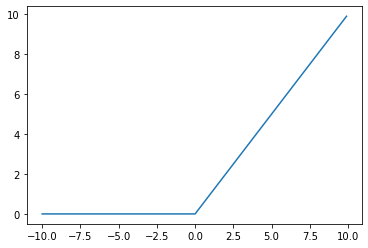

In [2]:
x = tf.Variable(tf.range(-10.0, 10.0, 0.1), dtype=tf.float32)
relu = tf.nn.relu(x)
plt.plot(x.numpy(), relu.numpy())

### 4.1.2 Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.
From the chart we can see that Relu function is contious without any interruptions
When the input is negative, the derivative of the ReLU function is 0, and when the input is positive, the derivative of the ReLU function is 1.
Also we can see that this function is  piecewise linear function
### 4.1.3 Show that  `tanh(𝑥)+1`=`2sigmoid(2𝑥)`.




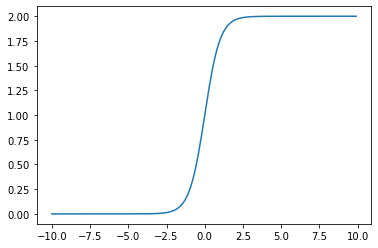

In [5]:
x = tf.Variable(tf.range(-10.0, 10.0, 0.1), dtype=tf.float32)
sign_func = 2 * tf.math.sigmoid(2*x)

plt.plot(x.numpy(), sign_func.numpy())

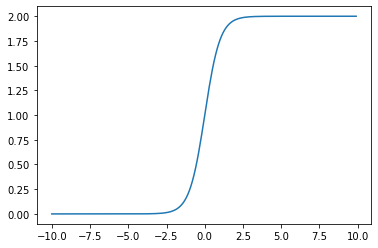

In [6]:
tan_func = tf.math.tanh(x) + 1
plt.plot(x.numpy(), tan_func.numpy())

### 4.1.4 Assume that we have a nonlinearity that applies to one minibatch at a time. What kinds of problems do you expect this to cause? 
I think it's performance, because we have to count output of softmax function in each layer. Also in my opinion it will be hard to learn with backprogation (we have additional softmax functions that are used in the operation)

# 4.1.2  Implementation of Multilayer Perceptrons from Scratch
---
1. Change the value of the hyperparameter num_hiddens and see how this hyperparameter influences your results. Determine the best value of this hyperparameter, keeping all others constant.
1. Try adding an additional hidden layer to see how it affects the results.
1. How does changing the learning rate alter your results? Fixing the model architecture and other hyperparameters (including number of epochs), what learning rate gives you the best results?
1. What is the best result you can get by optimizing over all the hyperparameters (learning rate, number of epochs, number of hidden layers, number of hidden units per layer) jointly?
1. Describe why it is much more challenging to deal with multiple hyperparameters.
1. What is the smartest strategy you can think of for structuring a search over multiple hyperparameters?


In [87]:
from exersize.d2l import tensorflow as d2l
import tensorflow as tf

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [88]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(tf.random.normal(
    shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))
W2 = tf.Variable(tf.random.normal(
    shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))


params = [W1, b1, W2, b2]

In [89]:
def relu(X):
    return tf.math.maximum(X, 0)

def net(X):
    X = tf.reshape(X, (-1, num_inputs))
    H = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(H, W2) + b2

def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(
        y, y_hat, from_logits=True)

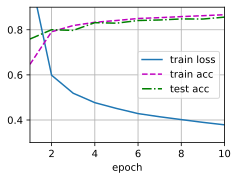

In [90]:
num_epochs, lr = 10, 0.1
updater = d2l.Updater([W1, W2, b1, b2], lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

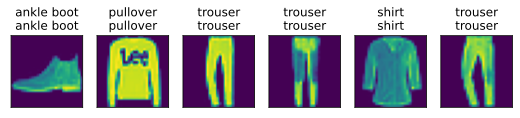

In [91]:
d2l.predict_ch3(net, test_iter)

### 4.2.1 Change the value of the hyperparameter num_hiddens and see how this hyperparameter influences your results. Determine the best value of this hyperparameter, keeping all others constant.


In [92]:
# Check perceptron results with various num hidden values
from typing import List


def get_params(num_inputs, num_outputs, num_hiddens)->List:
    """
        We paste different value into `num hiddens` 
        in order to find the best value of this param
    """
    W1 = tf.Variable(tf.random.normal(
    shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
    b1 = tf.Variable(tf.zeros(num_hiddens))
    W2 = tf.Variable(tf.random.normal(
    shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
    b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))
    params = [W1, b1, W2, b2]
    return params

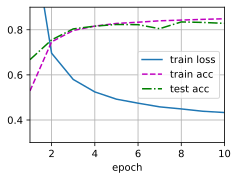

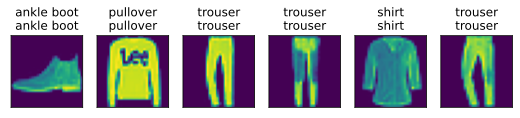

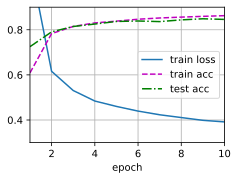

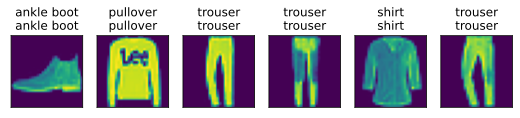

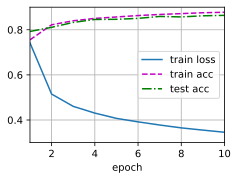

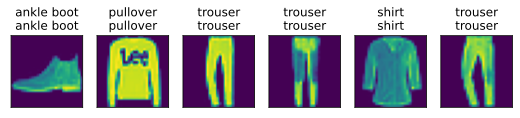

In [93]:
num_epochs, lr = 10, 0.1
num_inputs, num_outputs = 784, 10
list_or_num_hiddens = [10,100,10000]

for num_hidden in list_or_num_hiddens:
    W1, b1, W2, b2 = get_params(num_inputs, num_outputs, num_hidden)
    updater = d2l.Updater([W1, b1, W2, b2], lr)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
    d2l.predict_ch3(net, test_iter)

### 2. Try adding an additional hidden layer to see how it affects the results.
`d2l` lib is not allow to add additional layers !!!


In [47]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(tf.random.normal(
    shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))

W2 = tf.Variable(tf.random.normal(
    shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

W3 = tf.Variable(tf.random.normal(
    shape=(num_outputs, num_outputs), mean=0, stddev=0.01))
b3 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

params = [W1, b1, W2, b2]

In [54]:
num_epochs, lr = 10, 0.1
updater = d2l.Updater([W1, b1, W2, b2, W3, b3], lr) # Not work when we add additional layer!!!


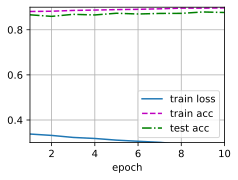

In [94]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

### 3. How does changing the learning rate alter your results? Fixing the model architecture and other hyperparameters (including number of epochs), what learning rate gives you the best results? 
I tried to change this params and result was the same in the network: this predict pretty well with all params 

### 4. What is the best result you can get by optimizing over all the hyperparameters (learning rate, number of epochs, number of hidden layers, number of hidden units per layer) jointly? #TODO
initial params predict 100% 

### 5. Describe why it is much more challenging to deal with multiple hyperparameters. #TODO
Because each params is important for result. Overfit and under could be if we use not right `params`

### 6. What is the smartest strategy you can think of for structuring a search over multiple hyperparameters? 
In my opinion good strategy is when we change only one params in one moment and then remeber the best value and go to the next param

# 4.3. Concise Implementation of Multilayer Perceptrons
---
1. Try adding different numbers of hidden layers (you may also modify the learning rate). What setting works best?
1. Try out different activation functions. Which one works best?
1. Try different schemes for initializing the weights. What method works best?

In [53]:
from exersize.d2l import tensorflow as d2l
import tensorflow as tf

In [54]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

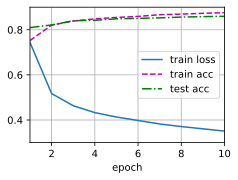

In [55]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

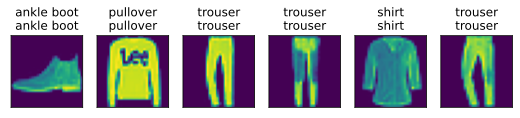

In [56]:
d2l.predict_ch3(net, test_iter)

### 4.3.1 Try adding different numbers of hidden layers (you may also modify the learning rate). What setting works best?

In [57]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

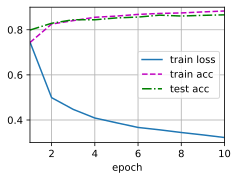

In [58]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

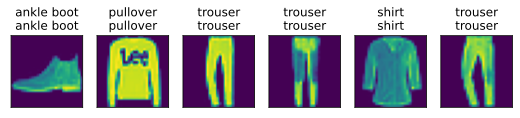

In [59]:
d2l.predict_ch3(net, test_iter)

In [60]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

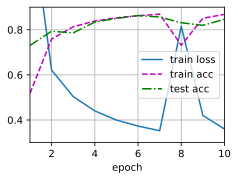

In [61]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

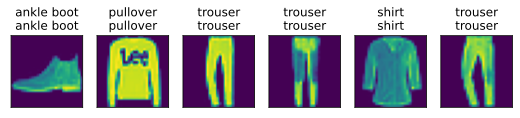

In [62]:
d2l.predict_ch3(net, test_iter)

### 4.3.2 Try out different activation functions. Which one works best?

In [63]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10)])

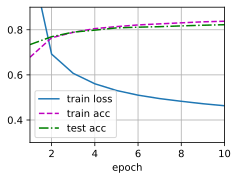

In [64]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

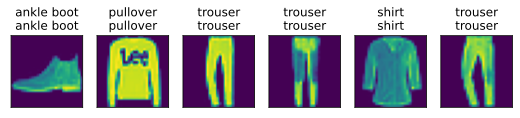

In [65]:
d2l.predict_ch3(net, test_iter)

With sigmoid function - result the same !!!!!

### 4.4.3. Try different schemes for initializing the weights. What method works best?
I don't know how i can initial with zeros and random value using d2l lib!

# 4.4 Model Selection, Underfitting, and Overfitting
---
1. Can you solve the polynomial regression problem exactly? Hint: use linear algebra.
1. Consider model selection for polynomials:

    1. Plot the `training loss` vs. `model complexity` (degree of the polynomial). What do you observe? What degree of polynomial do you need to reduce the training loss to 0?

    1. Plot the test loss in this case.

1. Generate the same plot as a function of the amount of data.

1. What happens if you drop the normalization ( 1/i! ) of the polynomial features  xi ? Can you fix this in some other way?

1. Can you ever expect to see zero generalization error?


# Implementation of own  Multiperceptron
---

In [66]:
import torch
import numpy as np

In [33]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/home/karim/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


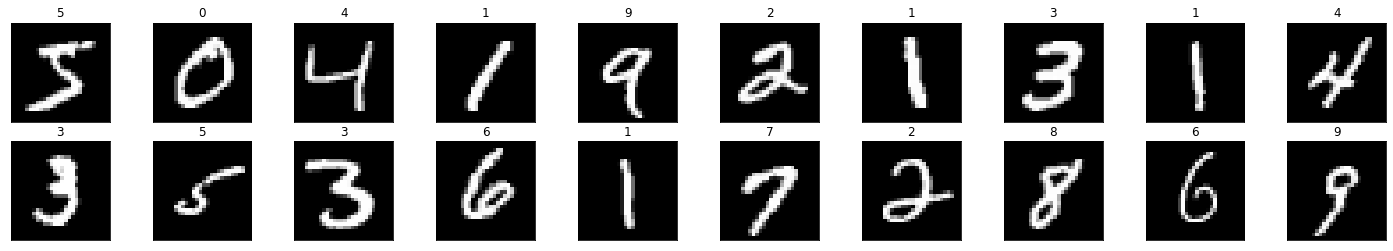

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

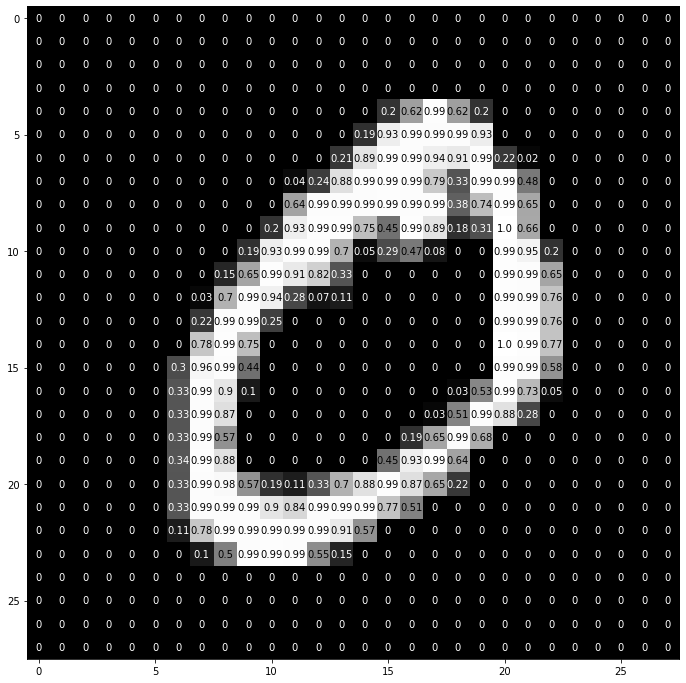

In [37]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [46]:

import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [47]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [48]:

# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.008435
Epoch: 2 	Training Loss: 0.414550
Epoch: 3 	Training Loss: 0.371162
Epoch: 4 	Training Loss: 0.349548
Epoch: 5 	Training Loss: 0.335860
Epoch: 6 	Training Loss: 0.326149
Epoch: 7 	Training Loss: 0.318779
Epoch: 8 	Training Loss: 0.312928
Epoch: 9 	Training Loss: 0.308131
Epoch: 10 	Training Loss: 0.304100
Epoch: 11 	Training Loss: 0.300647
Epoch: 12 	Training Loss: 0.297644
Epoch: 13 	Training Loss: 0.294997
Epoch: 14 	Training Loss: 0.292640
Epoch: 15 	Training Loss: 0.290522
Epoch: 16 	Training Loss: 0.288604
Epoch: 17 	Training Loss: 0.286855
Epoch: 18 	Training Loss: 0.285250
Epoch: 19 	Training Loss: 0.283770
Epoch: 20 	Training Loss: 0.282399
Epoch: 21 	Training Loss: 0.281124
Epoch: 22 	Training Loss: 0.279933
Epoch: 23 	Training Loss: 0.278818
Epoch: 24 	Training Loss: 0.277769
Epoch: 25 	Training Loss: 0.276781
Epoch: 26 	Training Loss: 0.275847
Epoch: 27 	Training Loss: 0.274963
Epoch: 28 	Training Loss: 0.274123
Epoch: 29 	Training Loss: 0.2

In [49]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.273901

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 88% (918/1032)
Test Accuracy of     3: 90% (916/1010)
Test Accuracy of     4: 92% (911/982)
Test Accuracy of     5: 87% (782/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 92% (947/1028)
Test Accuracy of     8: 88% (864/974)
Test Accuracy of     9: 90% (915/1009)

Test Accuracy (Overall): 92% (9234/10000)


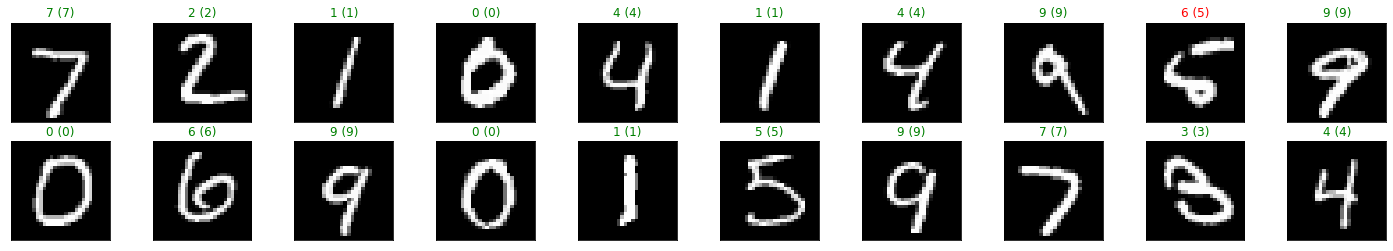

In [51]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Done!